# Logistic Regression

## Agenda

1. Learn how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Use LR to predict cancer
8. Guide to best practices of LR

## Part 1: Predicting a Continuous Response

In [1]:
# load breast cancer data dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
breast_cancer = load_breast_cancer()
cancerdata = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
target = breast_cancer.target

In [2]:
list(cancerdata)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [3]:
# 1=Benign tumor, 0=Malignant tumor
target.sum(), len(target)-target.sum()

(357, 212)

In [4]:
cancerdata.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Question:** Pretend that we want to predict **worst radius**, and our only feature/variable is **mean radius**. How could we do it?

**Answer:** We could model it as a simple regression problem, and use a linear regression model with **mean radius** as the only feature and **worst radius** as the response.

In [5]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X = cancerdata['mean radius'].values.reshape(-1,1)
y = cancerdata['worst radius'].values.reshape(-1,1)
linreg.fit(X, y)
pred_y = linreg.predict(X)

**Question:** How would we **visualize** this model?

**Answer:** Create a scatter plot with **mean radius** on the x-axis and **radius error** on the y-axis, and draw the line of best fit.

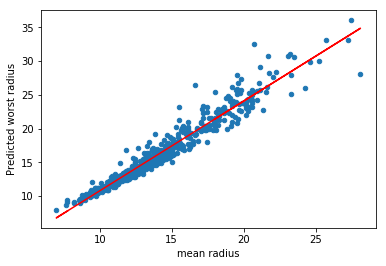

In [6]:
# scatter plot using Pandas
cancerdata.plot(kind='scatter', x='mean radius', y='worst radius');
plt.plot(X, pred_y, 'r');
plt.xlabel('mean radius');
plt.ylabel('Predicted worst radius');

### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [7]:
# compute prediction for mean radius = 15 using the equation
linreg.intercept_ + linreg.coef_ * 15

array([[17.42965186]])

In [8]:
print('beta_0 = ', linreg.intercept_, ' beta_1 = ', linreg.coef_)

beta_0 =  [-2.51622421]  beta_1 =  [[1.32972507]]


In [9]:
# compute prediction for al=2 using the predict method
linreg.predict(15)

array([[17.42965186]])

## Part 2: Predicting a Categorical Response

Let's change our task, so that we're predicting **household** using **al**. Let's visualize the relationship to figure out how to do this:

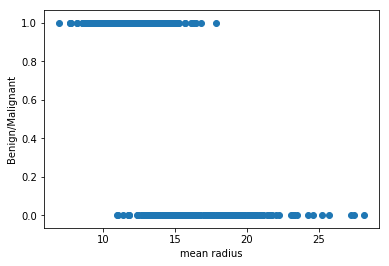

In [10]:
plt.scatter(cancerdata['mean radius'], target);
plt.xlabel('mean radius');
plt.ylabel('Benign/Malignant');

Let's draw a **regression line**, like we did before:

In [11]:
# fit a linear regression model and store the predictions
X = cancerdata['mean radius'].values.reshape(-1,1)
y = target
linreg.fit(X, y)
pred_y = linreg.predict(X)

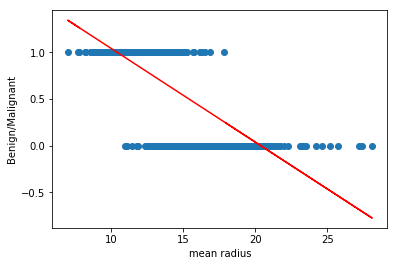

In [12]:
# scatter plot that includes the regression line
plt.scatter(cancerdata['mean radius'], target);
plt.xlabel('mean radius');
plt.ylabel('Benign/Malignant');
plt.plot(cancerdata['mean radius'], pred_y, color='red');

We predict the 1 class for **lower** values of *mean radius*, and the 0 class for **higher** values of *mean radius*. What's our cutoff value? Around **mean radius=15**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **pred_y >= 0.5**, we predict a class of **0**, else we predict a class of **1**.

In [13]:
# np.where returns the first value if the condition is True, and the second value if the condition is False
thres_y = np.where(cancerdata['mean radius'] <= 15, 1, 0)

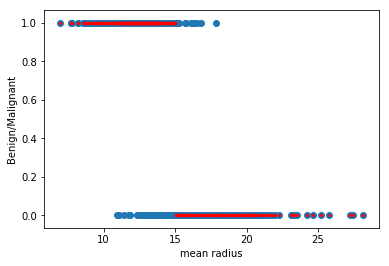

In [14]:
# scatter plot that includes the prediction outcome
plt.scatter(cancerdata['mean radius'], target);
plt.xlabel('mean radius');
plt.ylabel('Benign/Malignant');
plt.scatter(cancerdata['mean radius'], thres_y, color='red', s=5);

## Part 3: Using Logistic Regression Instead

Logistic regression can do what we just did:

In [15]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X = cancerdata['mean radius'].values.reshape(-1,1)
y = target
logreg.fit(X, y)
pred_y = logreg.predict(X)

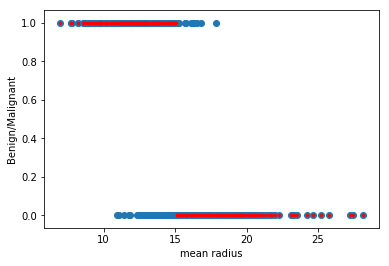

In [16]:
# plot the class predictions
plt.scatter(cancerdata['mean radius'], target);
plt.xlabel('mean radius');
plt.ylabel('Benign/Malignant');
plt.scatter(cancerdata['mean radius'], pred_y, color='red', s=5);

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [17]:
# store the predicted probabilites of class 1
prob_y = logreg.predict_proba(X)[:, 1]

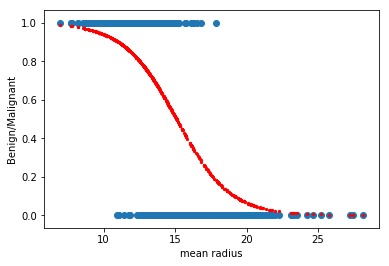

In [18]:
# plot the predicted probabilities
plt.scatter(cancerdata['mean radius'], target);
plt.xlabel('mean radius');
plt.ylabel('Benign/Malignant');
plt.scatter(cancerdata['mean radius'], prob_y, color='red',s=5);

In [19]:
# examine some example predictions
print(logreg.predict_proba(10))
print(logreg.predict_proba(20))

[[0.05925817 0.94074183]]
[[0.93489354 0.06510646]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## Part 4: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [20]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [21]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## Part 5: What is Logistic Regression?

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

## Part 6: Interpreting Logistic Regression Coefficients

In [22]:
# compute predicted log-odds for mean radius=20 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 20
logodds

array([-2.66440889])

In [23]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([0.06964051])

In [24]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.06510646])

In [25]:
# compute predicted probability for mean radius=20 using the predict_proba method
logreg.predict_proba(20)[:, 1]

array([0.06510646])

In [26]:
# examine the coefficient for mean radius
logreg.coef_[0]

array([-0.54291739])

**Interpretation:** A 1 unit increase in 'mean radius' is associated with a 0.54 unit decrease in the log-odds of 'benign'. -> increase the log-odds of 'malignant'

In [27]:
# increasing mean radius by 1 (so that al=3) increases the log-odds by 4.18
logodds = -2.66440889-0.54291739
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob, odds

(0.03889095083488293, 0.04046465993496386)

In [28]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(21)[:, 1]

array([0.03889095])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

## Part 7: Using Logistic Regression to predict cancer

In [29]:
# fit a logistic regression model
X = cancerdata
y = target
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# test the "predictability" of our data
y_hat = logreg.predict(X)
from sklearn import metrics
print(metrics.classification_report(y, y_hat), '\n  accuracy score=', metrics.accuracy_score(y, y_hat), '\n  confusion matrix = \n', metrics.confusion_matrix(y, y_hat))

             precision    recall  f1-score   support

          0       0.96      0.93      0.95       212
          1       0.96      0.97      0.97       357

avg / total       0.96      0.96      0.96       569
 
  accuracy score= 0.9595782073813708 
  confusion matrix = 
 [[198  14]
 [  9 348]]


**Train/Test Split:** To obtain the true performance of logistic regression, we need to train and test on split data).

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

Let's use all of classifiers we have learned so far

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# train and test KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
# train and test Naive Bayes
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
# train and test LR
logreg.fit(X_train, y_train)
y_logreg = logreg.predict(X_test)

In [33]:
print('  KNN accuracy score=', metrics.accuracy_score(y_test, y_knn), '\n  GNB accuracy score=', metrics.accuracy_score(y_test, y_gnb), '\n  LogReg accuracy score=', metrics.accuracy_score(y_test, y_logreg))

  KNN accuracy score= 0.925531914893617 
  GNB accuracy score= 0.9414893617021277 
  LogReg accuracy score= 0.9627659574468085


In [34]:
np.exp(logreg.coef_), list(cancerdata)

(array([[4.87112515, 1.05983742, 1.07273008, 0.9971983 , 0.88396777,
         0.77643239, 0.62555501, 0.79989744, 0.86075005, 0.98380742,
         0.99543848, 3.37469708, 1.03267859, 0.90543073, 0.98763434,
         1.01047038, 0.95070608, 0.97227597, 0.98388384, 1.00289784,
         4.47576668, 0.73129816, 0.80765179, 0.97692569, 0.79398248,
         0.41950578, 0.24803965, 0.63568335, 0.64744898, 0.89506067]]),
 ['mean radius',
  'mean texture',
  'mean perimeter',
  'mean area',
  'mean smoothness',
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean symmetry',
  'mean fractal dimension',
  'radius error',
  'texture error',
  'perimeter error',
  'area error',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst radius',
  'worst texture',
  'worst perimeter',
  'worst area',
  'worst smoothness',
  'worst compactness',
  'worst concavity',
  'worst concave points

## Part 8: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions